In [139]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [140]:
with open('../../outputs/bert/train_metrics.pickle', 'rb') as f:
    training_metrics = pickle.load(f)

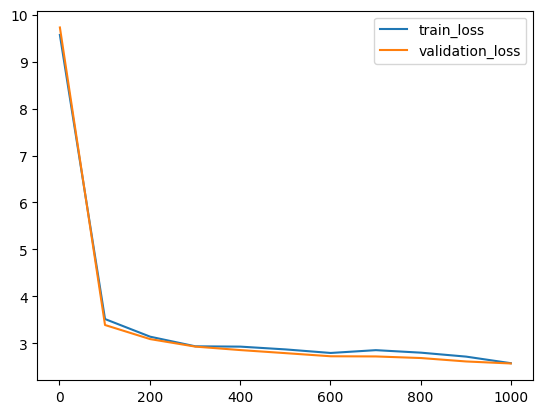

In [141]:
plt.plot(*list(zip(*[(m['global_step'], m['train_loss']) for m in training_metrics])), label='train_loss')
plt.plot(*list(zip(*[(m['global_step'], m['validation_loss']) for m in training_metrics])), label='validation_loss')
for point in [m['global_step'] for i, m in enumerate(training_metrics) if training_metrics[i-1]['epoch'] != m['epoch']]:
    plt.axvline(x=point, linestyle='--')
plt.legend()
plt.show()

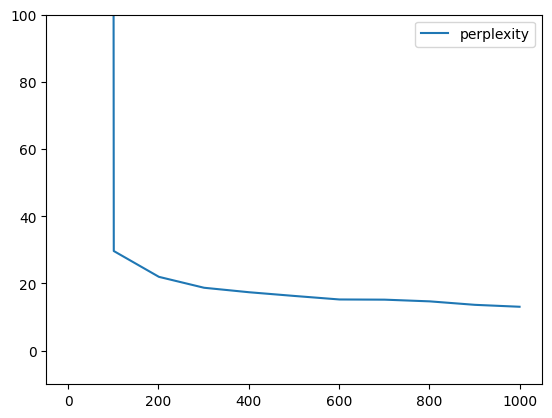

In [142]:
plt.plot(*list(zip(*[(m['global_step'], m['perplexity']) for m in training_metrics])), label='perplexity')
for point in [m['global_step'] for i, m in enumerate(training_metrics) if training_metrics[i-1]['epoch'] != m['epoch']]:
    plt.axvline(x=point, linestyle='--', c='black')
plt.ylim(top=100, bottom=-10)
plt.legend()
plt.show()

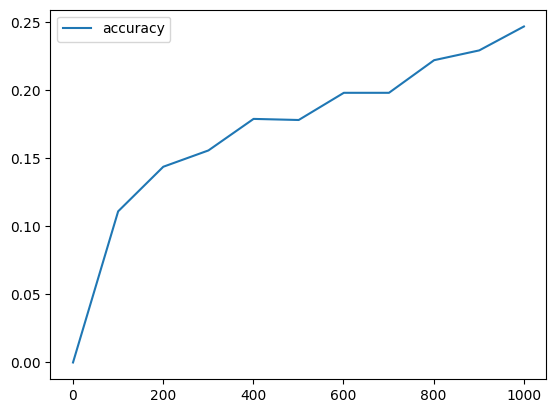

In [143]:
plt.plot(*list(zip(*[(m['global_step'], m['accuracy'].item()) for m in training_metrics])), label='accuracy')# plt.plot(*list(zip(*[(m['global_step'], m['perplexity'].item()) for m in training_metrics])), label='perplexity')
for point in [m['global_step'] for i, m in enumerate(training_metrics) if training_metrics[i-1]['epoch'] != m['epoch']]:
    plt.axvline(x=point, linestyle='--', c='black')
plt.legend()
plt.show()

In [144]:
min([m['validation_loss'] for m in training_metrics])

2.570441961288452

# Final Evaluation Outputs

In [145]:
food_names = np.load('../../../data/local/final/full/food_names/0.npy', allow_pickle=True)
food_names.shape

(1109,)

In [146]:
input = training_metrics[-1]['input']
output = training_metrics[-1]['output']

In [147]:
pd.set_option('max_colwidth', None)

In [148]:
input[1].shape

torch.Size([1000, 15])

In [149]:
pd.DataFrame({
    'input': food_names[input[0]].tolist(), 
    'mask_pos': input[3].tolist(),
    'label': food_names[input[2]].tolist(),
    'prediction': food_names[output.argmax(2)].tolist(), 
})

,input,mask_pos,label,prediction
0,"[gelatin, water, yogurt, sugar, vanilla, <mask>, sweet orange, cinnamon, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>]","[5, 0]","[cardamom, <pad>]","[butter, gelatin]"
1,"[<mask>, sugar, pudding, cinnamon, margarine, nut, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>]","[0, 0]","[egg roll, <pad>]","[egg, egg]"
2,"[cracker, butter, sugar, <mask>, sauce, water, cocoa powder, salt, potato chip, <mask>, <pad>, <pad>, <pad>, <pad>, <pad>]","[9, 3]","[marshmallow, flour]","[flour, flour]"
3,"[coffee, <mask>, curry powder, sugar substitute, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>]","[1, 0]","[almond, <pad>]","[butter, coffee]"
4,"[pie crust, spinach, egg, onion-family vegetable, nutmeg, crab, cheese, evaporated milk, salt, pepper, mung bean, <pad>, <pad>, <pad>, <pad>]","[7, 10]","[evaporated milk, parsley]","[cheese, cheese]"
...,...,...,...,...
995,"[cook common octopus, onion-family vegetable, green turtle, sauce, garlic, green bean, rice, cheese, tortilla, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>]","[0, 0]","[meat bouillon, <pad>]","[butter, butter]"
996,"[chicken, sauce, walnut, sweet orange, <mask>, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>]","[4, 0]","[<unknown>, <pad>]","[butter, chicken]"
997,"[egg, cream, buttermilk, honey, curry powder, <mask>, salt, flour, butter, vanilla, domestic pig, syrup, <pad>, <pad>, <pad>]","[5, 9]","[water, vanilla]","[sugar, vanilla]"
998,"[butter, flour, curry powder, salt, sugar, egg, <mask>, milk cow, chocolate, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>]","[6, 0]","[vanilla, <pad>]","[vanilla, butter]"
